In [12]:
import os
# os.chdir('..')
os.chdir('desktop\pythonn\TensorFlow')
os.getcwd()

'C:\\Users\\lg\\desktop\\pythonn\\TensorFlow'

In [13]:
%matplotlib inline
import tensorflow as tf
import pylab
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.zeros([10]))
#正向输出节点
pred = tf.nn.softmax(tf.matmul(x,W) + b)

In [15]:
#反向传播结构
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices = 1))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
training_epochs = 25
batch_size = 100
display_step = 1
saver = tf.train.Saver()
model_path = 'log/520model.ckpt'
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c = sess.run([optimizer,cost],feed_dict = {x:batch_xs,y:batch_ys})
            avg_cost += c/total_batch
        if (epoch+1) % display_step == 0:
            print('Epoch:','%04d' % (epoch + 1),'cost=','{:.9f}'.format(avg_cost))
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    save_path = saver.save(sess,model_path)
    print('Model saved in file: %s' % save_path)
    print('Accuracy:',accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))
    print('Finished!')

Epoch: 0001 cost= 8.056208710
Epoch: 0002 cost= 4.427135948
Epoch: 0003 cost= 3.123569296
Epoch: 0004 cost= 2.497755315
Epoch: 0005 cost= 2.126881260
Epoch: 0006 cost= 1.878362182
Epoch: 0007 cost= 1.699102484
Epoch: 0008 cost= 1.563329468
Epoch: 0009 cost= 1.456640107
Epoch: 0010 cost= 1.370273972
Epoch: 0011 cost= 1.298970521
Epoch: 0012 cost= 1.238793946
Epoch: 0013 cost= 1.187586028
Epoch: 0014 cost= 1.143229386
Epoch: 0015 cost= 1.104556423
Epoch: 0016 cost= 1.070378630
Epoch: 0017 cost= 1.040060771
Epoch: 0018 cost= 1.012838745
Epoch: 0019 cost= 0.988378785
Epoch: 0020 cost= 0.966177371
Epoch: 0021 cost= 0.945909662
Epoch: 0022 cost= 0.927225819
Epoch: 0023 cost= 0.909940273
Epoch: 0024 cost= 0.894177016
Epoch: 0025 cost= 0.879266440
Model saved in file: log/520model.ckpt
Accuracy: 0.8225
Finished!


Starting 2nd session...
INFO:tensorflow:Restoring parameters from log/520model.ckpt
Accuracy: 0.8225
预测结果： [4 3 8] 
标签值： [[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]] 
预测真实输出： [[  5.09033271e-05   5.04514992e-18   2.07802042e-09   6.83914870e-04
    9.39751506e-01   1.01035394e-05   6.17419355e-05   7.70264649e-07
    1.52650282e-05   5.94259091e-02]
 [  1.63057010e-07   2.75278147e-08   1.28388838e-05   9.99861479e-01
    6.28207272e-05   2.72063426e-05   5.29127888e-08   5.40967790e-07
    3.44315522e-05   4.29303526e-07]
 [  3.65777055e-07   2.52269470e-04   1.56673224e-04   2.14669481e-01
    3.43095378e-11   1.52378050e-06   3.89844331e-07   5.79757852e-07
    7.84918368e-01   3.20677827e-07]]


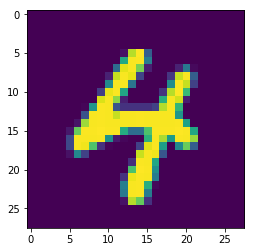

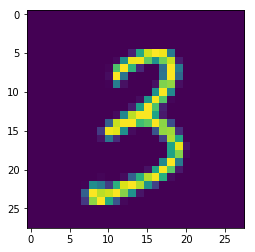

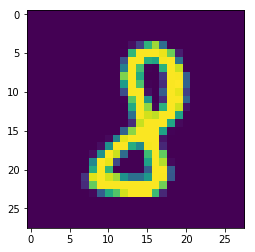

In [18]:
print("Starting 2nd session...")
saver = tf.train.Saver()
model_path = 'log/520model.ckpt'
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,model_path)
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print('Accuracy:',accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))
    output = tf.argmax(pred,1)
    batch_xs,batch_ys = mnist.train.next_batch(3)
    outputval,predv = sess.run([output,pred],feed_dict = {x:batch_xs})
    print('预测结果：',outputval,'\n标签值：',batch_ys,'\n预测真实输出：',predv)
    
    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[2]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()